<H1>COMP4531 Deep Learning Mid-Term</H1>

### Amy Schneider

In this project, we will be developing a basic neural network from the ground up to classify various types of fashion items. The primary objective of this project is to gain a comprehensive understanding of neural network architecture, including its theory and implementation details.

<H2>Part 0: Initialization</H2>

To start, let's load some packages and the dataset

In [1]:
# Notice that you don't need any other packages for this mid-term

import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

random.seed(42) # NEVER change this line; this is for grading

In [2]:
# Reading the dataset
data = pd.read_csv('./fashion_data.csv')

In [3]:
# The data pre-processing is done for you. Please do NOT edit the cell
# However, you should understand what these codes are doing

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:400].T
Y_dev = data_dev[-1]
X_dev = data_dev[0:n-1]
X_dev = X_dev / 255.

data_train = data[400:m].T
Y_train = data_train[-1]
X_train = data_train[0:n-1]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([7, 3, 6, ..., 6, 2, 6])

In [5]:
X_dev.shape

(784, 400)

In [6]:
X_train.shape

(784, 1600)

In [7]:
print(m,n)

2000 785


<H2>Part 1: Building your own neural network</H2>

In [8]:
# define a global variable specifying the number of hidden neurons after the first layer
# not the best practice, but we will do it for this mid-term project
num_hidden_neurons = 20

This is the main part of the mid-term. You **must not** change the definition of the function. In fact, the comments are going to help you go through the implementation and they are all you need

<H3>1.1 Initialize the parameter in the neural network</H3>

In [9]:
# Initialize the parameters in the neural network

# Based on the figure above, we need the weight and bias matrices. 
# W1, b1 are the matrices for the first layer
# W2, b2 are the matrices for the second layer

# You should think about the sizes of the matrices
# then initialize elements in the matrix to be random numbers between -0.5 to +0.5

    # np.random.rand generates random values from a uniform distribution between 0 and 1,
    # subtracting 0.5 shifts this distribution to be between -0.5 and 0.5

def init_params():
    
    # Number of input features
    input_size = X_train.shape[0]
    
    # Number of classes in the classification task (as outlined in COMP4531_Mid-Term_Project.pdf)
    output_size = 10
    
    # Initialize parameters for the first layer (W1, b1):
    
    # W1: weights (num_hidden_neurons x input_size) initialized between -0.5 and 0.5.
    W1 = np.random.rand(num_hidden_neurons, input_size) - 0.5
    # b1: biases (num_hidden_neurons x 1) initialized between -0.5 and 0.5.
    b1 = np.random.rand(num_hidden_neurons, 1) - 0.5
    
    # Initialize parameters for the second layer (W2, b2):
    # W2: weights (output_size x num_hidden_neurons) initialized between -0.5 and 0.5.
    W2 = np.random.rand(output_size, num_hidden_neurons) - 0.5
    # b2: biases (output_size x 1) initialized between -0.5 and 0.5.
    b2 = np.random.rand(output_size, 1) - 0.5
    
    return W1, b1, W2, b2

<H3>1.2 Implement the non-linearity functions and its derivatives</H3>

In [10]:
# As a starting point, you only need a ReLu function, its derivative, and the softmax function 

def ReLU(Z):
    # Computes the Rectified Linear Unit (ReLU) activation for each element in Z
    # Parameters: Z (numpy array) - linear transformation output
    # Returns: A (numpy array) - ReLU activation
    
    A = np.maximum(0, Z)
    return A

def ReLU_deriv(Z):
    # Computes the derivative of the ReLU activation for each element in Z
    # Parameters: Z (numpy array) - linear transformation output
    # Returns: dA (numpy array) - derivative of ReLU activation
    
    dA = np.where(Z > 0, 1, 0)
    return dA

def softmax(Z):
    # Computes the softmax activation for each element in Z
    # Parameters: Z (numpy array) - linear transformation output
    # Returns: A (numpy array) - softmax activation
    
    exp_Z = np.exp(Z - np.max(Z))  # Subtracting max(Z) for numerical stability
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    
    # Your code here
    return A

<H3>1.3 Implement the forward propagation function</H3>

In [11]:
# In the forward propagation function, X is the inputs (the image in vector form), and we pass all the weights and biases

def forward_prop(W1, b1, W2, b2, X):
    
    # First layer
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)  # Apply ReLU activation to first layer
    
    # Second layer
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)  # Computes the softmax activation for each element in Z
    
    return Z1, A1, Z2, A2

<H3>1.4 Implement the backward propagation function</H3>

In [12]:
# This one hot function is to convert a numeric number into a one-hot vector
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1

    return one_hot_Y

# Now performing the backward propagation
# Each function is only one line, but lots of Calculus behind 
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    
    # Convert target labels Y into one-hot encoded vectors
    one_hot_Y = one_hot(Y)
    # Get number of training examples
    m = Y.shape[0]
    
    # Backward pass for second layer
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    # Backward pass for first layer
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Return gradients for updating parameters
    return dW1, db1, dW2, db2

# Finally, we are ready to update the parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    
    # Update each parameter using learning rate (alpha) and its corresponding gradient (from backward_prop)
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    
    return W1, b1, W2, b2

<H3>1.5 Performing the gradient descent</H3>

In [13]:
# Implement the helper function. We need to convert the softmax output into a numeric label 
# This is done through get_predictions function
def get_predictions(A2):
    # Get index of maximum value along each column (axis=0)
    return np.argmax(A2, axis=0)

# We also want to have a simple function to compute the accuracy. Notice that "predictions" and "Y" are the same shape
def get_accuracy(predictions, Y):
    # Calculate accuracy by comparing predicted labels with true labels
    accuracy = np.mean(predictions == Y) * 100
    return accuracy

# Finally, we are ready to implement gradient descent
def gradient_descent(X, Y, alpha, iterations):
    
    # Initialize parameters using init_params()
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        # Perform forward propagation
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        
        # Perform backward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        
        # Update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        # Print accuracy every 10 iterations
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            # print(get_accuracy(predictions, Y)) # original code
            accuracy = get_accuracy(predictions, Y)
            print("Accuracy: {:.2f}%\n".format(accuracy)) # Reformatted to show as percent and space out iterations

    # Return the final trained parameters
    return W1, b1, W2, b2

In [14]:
# W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500) # original code
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 501) # To include interation 500

Iteration:  0
Accuracy: 12.12%

Iteration:  10
Accuracy: 39.56%

Iteration:  20
Accuracy: 53.25%

Iteration:  30
Accuracy: 58.69%

Iteration:  40
Accuracy: 61.94%

Iteration:  50
Accuracy: 63.94%

Iteration:  60
Accuracy: 65.94%

Iteration:  70
Accuracy: 67.12%

Iteration:  80
Accuracy: 68.44%

Iteration:  90
Accuracy: 69.50%

Iteration:  100
Accuracy: 70.19%

Iteration:  110
Accuracy: 71.19%

Iteration:  120
Accuracy: 72.12%

Iteration:  130
Accuracy: 72.44%

Iteration:  140
Accuracy: 71.31%

Iteration:  150
Accuracy: 71.81%

Iteration:  160
Accuracy: 72.56%

Iteration:  170
Accuracy: 73.06%

Iteration:  180
Accuracy: 73.88%

Iteration:  190
Accuracy: 73.88%

Iteration:  200
Accuracy: 74.31%

Iteration:  210
Accuracy: 74.81%

Iteration:  220
Accuracy: 75.06%

Iteration:  230
Accuracy: 75.12%

Iteration:  240
Accuracy: 76.12%

Iteration:  250
Accuracy: 76.56%

Iteration:  260
Accuracy: 76.75%

Iteration:  270
Accuracy: 77.19%

Iteration:  280
Accuracy: 77.44%

Iteration:  290
Accuracy:

<H3>1.6 Validation Set Performance</H3>

In [15]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [20]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

Accuracy: 77.00%



<H3>1.7 Exploring some samples</H3>

Prediction:  [7]
Label:  7


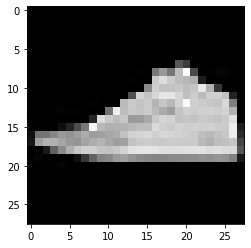

Prediction:  [3]
Label:  3


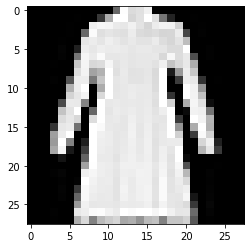

Prediction:  [4]
Label:  6


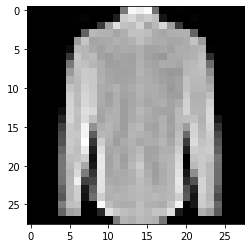

Prediction:  [0]
Label:  0


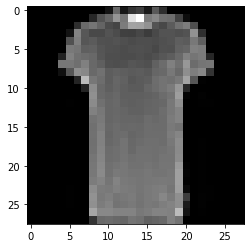

In [17]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)

<H2>Part 2: Error Analysis and Performance Improvements</H2>

Based on the neural network, you should recommend some next steps in this part. Some ideas include investigating where the model fails to predict and/or trying to improve the model performance through, for example, different activation functions, expanding the network complexity.

**It is crucial to provide reasoning behind what you do, or else no credit will be given.**

### Analyze your results, understand the model weakness, optimize your model and/or collect more data
 
**Analyze Results**

The initial neural network shows promise with a training accuracy of 82.94%. However, there are signs of potential overfitting, as evidenced by a slightly lower validation accuracy of 77.00%.

**Understand Model Weakness(es)**

To gain insight into the model's weaknesses and pinpoint where it falls short, I started by constructing and interpreting a confusion matrix and classification report to identify instances of misclassification

Confusion Matrix:
[[41  0  2  1  1  1  1  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 1  0 27  0  9  0  3  0  1  0]
 [ 1  0  0 36  0  0  1  0  1  0]
 [ 0  1  5  5 23  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  3  1  4]
 [ 7  0 11  4  5  1  6  0  3  0]
 [ 0  0  0  0  0  4  0 32  0  5]
 [ 0  0  3  1  0  0  1  1 39  0]
 [ 0  0  0  0  0  1  0  3  0 43]]



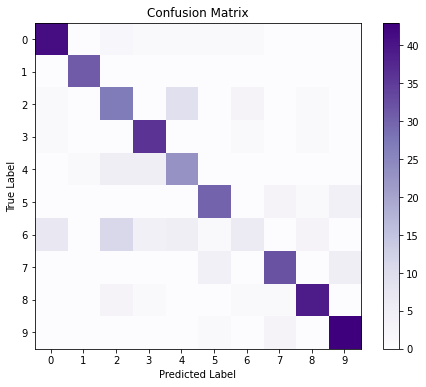

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.97      1.00      0.98        31
           2       0.56      0.66      0.61        41
           3       0.77      0.92      0.84        39
           4       0.61      0.68      0.64        34
           5       0.81      0.79      0.80        38
           6       0.50      0.16      0.24        37
           7       0.82      0.78      0.80        41
           8       0.87      0.87      0.87        45
           9       0.83      0.91      0.87        47

    accuracy                           0.77       400
   macro avg       0.75      0.76      0.75       400
weighted avg       0.76      0.77      0.75       400


Top 3 most common errors:
True Label: 6, Predicted Label: 2, Count: 11
True Label: 2, Predicted Label: 4, Count: 9
True Label: 6, Predicted Label: 0, Count: 7


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

def analyze_misclassifications(predictions, true_labels, X_data):
    # Initialize confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print()
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(set(true_labels)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(true_labels, predictions))
    print()

    # Find misclassifications
    misclassifications = [(true_labels[i], predictions[i]) for i in range(len(predictions)) if predictions[i] != true_labels[i]]
    
    # Count misclassifications
    error_counts = Counter(misclassifications)
    
    # Print top 3 most common errors
    print("Top 3 most common errors:")
    for error, count in error_counts.most_common(3):
        true_label, predicted_label = error
        print(f"True Label: {true_label}, Predicted Label: {predicted_label}, Count: {count}")

analyze_misclassifications(dev_predictions, Y_dev, X_dev)

The confusion matrix and classification report indicates that the model exhibits significant confusion between certain clothing categories, notably (2) Pullover and (4) Coat, as well as (6) Shirt and (2) Pullover. This confusion is sensible given the visual similarities between these items; for instance, distinguishing a Pullover from a Coat, or a Shirt from a Pullover, can be challenging due to overlapping characteristics like sleeve length, texture, and style. Consequently, it's unsurprising that these pairs are the top three most common errors, reflecting the inherent complexity of the classification task.

To mitigate these model weaknesses, we could apply Data Augmentation, adding additional diverse examples of the problematic class differentiations. Providing the model with more varied instances to learn from would improve its ability to distinguish between similar classes such as (2) Pullover and (4) Coat, and (6) Shirt and (2) Pullover. 

Additionally, techniques like fine-tuning the model architecture to emphasize subtle distinguishing features or adjusting class weights to assign higher penalties for misclassifications in critical areas could improve performance.

**Model Optimization and/or Collecting More Data**

To address overfitting and improve generalization, various optimization techniques such as L1/L2 regularization, dropout, or early stopping can be applied during training. I opted for L2 regularization due to its ability to effectively prevent overfitting by penalizing large weights, thus balancing model complexity and simplicity while promoting generalization.

In [35]:
# Implement backward propagation with regularization
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, lambda_reg):
    # Convert Y to one-hot encoding
    one_hot_Y = one_hot(Y)
    m = Y.shape[0]  # Number of training examples
    
    # Backward pass for the second layer
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambda_reg / m) * W2  # Add L2 regularization to weights
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    # Backward pass for the first layer
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T) + (lambda_reg / m) * W1  # Add L2 regularization to weights
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

# Perform gradient descent with regularization
def gradient_descent(X, Y, alpha, iterations, lambda_reg):
    # Initialize parameters
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, lambda_reg)
        
        # Update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        # Print accuracy every 10 iterations
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print("Accuracy: {:.2f}%\n".format(accuracy))  # Print accuracy
            
    return W1, b1, W2, b2

best_accuracy = 0  # Initialize best accuracy
best_lambda_reg = None  # Initialize best lambda_reg

# Define regularization strengths to try
lambda_regs = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]

# Iterate over each regularization strength
for lambda_reg in lambda_regs:
    # Perform gradient descent with current lambda_reg
    W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 501, lambda_reg=lambda_reg)
    
    # Make predictions on development set
    dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
    
    # Calculate accuracy on development set
    dev_accuracy = get_accuracy(dev_predictions, Y_dev)
    
    # Update best accuracy and lambda_reg
    if dev_accuracy > best_accuracy:
        best_accuracy = dev_accuracy
        best_lambda_reg = lambda_reg

# Print the best outcome
print("Best Accuracy on Development Set: {:.2f}% (achieved with lambda_reg={})".format(best_accuracy, best_lambda_reg))

Iteration:  0
Accuracy: 11.94%

Iteration:  10
Accuracy: 38.00%

Iteration:  20
Accuracy: 49.94%

Iteration:  30
Accuracy: 56.31%

Iteration:  40
Accuracy: 60.81%

Iteration:  50
Accuracy: 63.75%

Iteration:  60
Accuracy: 66.25%

Iteration:  70
Accuracy: 67.69%

Iteration:  80
Accuracy: 69.31%

Iteration:  90
Accuracy: 70.31%

Iteration:  100
Accuracy: 71.12%

Iteration:  110
Accuracy: 71.75%

Iteration:  120
Accuracy: 72.81%

Iteration:  130
Accuracy: 73.50%

Iteration:  140
Accuracy: 74.19%

Iteration:  150
Accuracy: 75.12%

Iteration:  160
Accuracy: 74.12%

Iteration:  170
Accuracy: 74.56%

Iteration:  180
Accuracy: 75.31%

Iteration:  190
Accuracy: 75.94%

Iteration:  200
Accuracy: 76.31%

Iteration:  210
Accuracy: 76.62%

Iteration:  220
Accuracy: 76.88%

Iteration:  230
Accuracy: 77.19%

Iteration:  240
Accuracy: 77.88%

Iteration:  250
Accuracy: 77.94%

Iteration:  260
Accuracy: 78.44%

Iteration:  270
Accuracy: 78.81%

Iteration:  280
Accuracy: 79.06%

Iteration:  290
Accuracy:

Applying L2 regularization with a moderate strength improved the model's generalization performance on unseen data, slightly mitigating overfitting. The best accuracy achieved on the development set was 80.00%, achieved with a lambda_reg value of 0.5.

Finally, collecting more diverse and representative data can further improve the model's performance by providing it with a richer set of examples to learn from. Acquiring additional images of clothing items across different styles, textures, and variations will ensure that the model learns to generalize well across the entire spectrum of clothing categories.

**Conclusion**

While recognizing the potential for further improvement, I am confident in presenting this model as a strong foundation. Through analysis, strategic optimization, and exploration of potential enhancements, I believe that the constructed neural network will deliver dependable classification accuracy